In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


The first 5 rows

In [4]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


The last 5 rows

In [5]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Statistical information of dataset.

In [7]:
df.shape

(200, 5)

200 rows , 5 columns in data set.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There is no null values presnt in data set

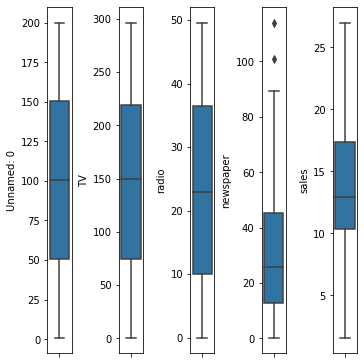

In [10]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(5,5))
index = 0
ax = ax.flatten()

for col, value in df.items():
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

There is outliers in the newspaper by Removing the outliers we can improve the model accuracy.

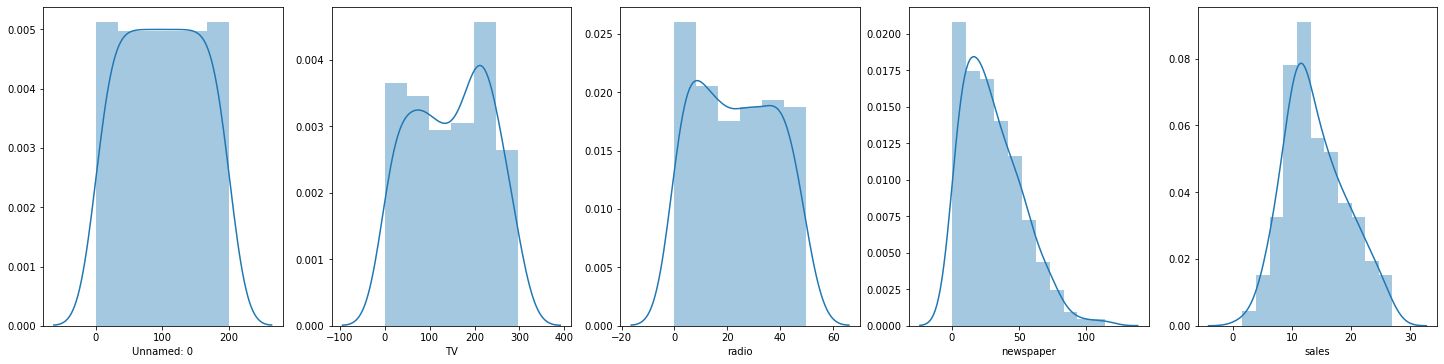

In [11]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(20,5))
index = 0
ax = ax.flatten()

for col, value in df.items():
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Here we observe all the values are appox to noramal distribution or Bell shape curve.

In [12]:
df['newspaper'] = np.log(1 + df['newspaper'])

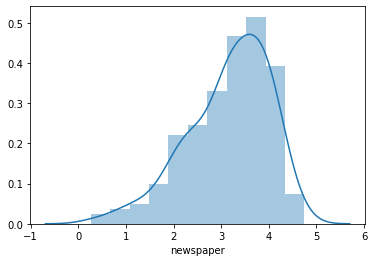

In [13]:
sns.distplot(df['newspaper'])

By using log operation we can make it as normal distributed bell shape curve.

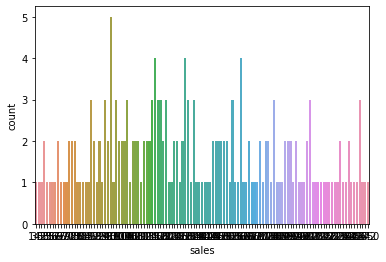

In [14]:
sns.countplot(df['sales'])

By using count plot we got the sales of tv,radio,newspaper Different range of values and its called as class imbalancement.

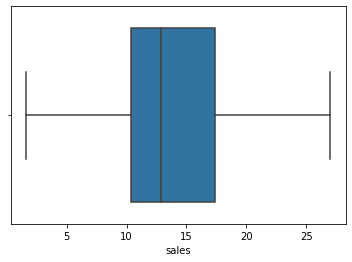

In [15]:
sns.boxplot(df['sales'])
plt.show()

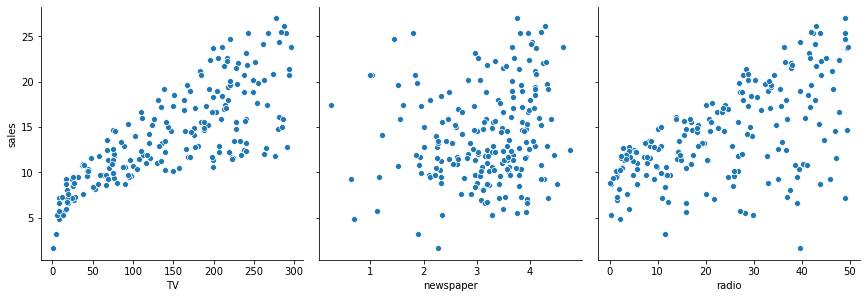

In [16]:
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

We can observe spreading of Datas in radio,tv,newspaper.

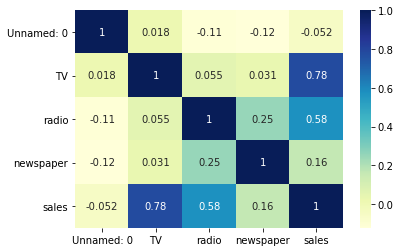

In [17]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales.

In [18]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(200, 5)
(199, 5)


By using z_score we can remove some of unwanted data.

In [19]:
df1.skew()

Unnamed: 0   -0.009754
TV           -0.063150
radio         0.090691
newspaper    -0.717354
sales         0.416327
dtype: float64

In [20]:
x = df.drop(columns=['sales'])
y = df['sales']

In [21]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(160, 4) (40, 4)
(160,) (40,)


In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(40,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corrospoding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score to ",final_r_state,"is",max_r_score)
    return final_r_state

In [23]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corrospoding to  40 is 0.8363980609063592
r2 score corrospoding to  41 is 0.8880650509758434
r2 score corrospoding to  42 is 0.8638088860787705
r2 score corrospoding to  43 is 0.9223661362245854
r2 score corrospoding to  44 is 0.871503752498909
r2 score corrospoding to  45 is 0.901375706563803
r2 score corrospoding to  46 is 0.8360931008927329
r2 score corrospoding to  47 is 0.8198099801879402
r2 score corrospoding to  48 is 0.927163943341832
r2 score corrospoding to  49 is 0.8237790034935308
r2 score corrospoding to  50 is 0.8561277264293323
r2 score corrospoding to  51 is 0.8616029893452262
r2 score corrospoding to  52 is 0.8884783841891378
r2 score corrospoding to  53 is 0.9084602509208545
r2 score corrospoding to  54 is 0.9196116070785125
r2 score corrospoding to  55 is 0.9123925513820931
r2 score corrospoding to  56 is 0.9068960463738338
r2 score corrospoding to  57 is 0.9287444014507893
r2 score corrospoding to  58 is 0.8478158275170703
r2 score corrospoding to  59 is 0.

maxmium r2 score to 57 is 0.92

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
cross_val_score(LinearRegression(),x,y,cv=5,scoring='neg_mean_absolute_error').mean()

-1.3065615598027203

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state =62,test_size=0.33)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is :",r2_score(y_test,y_pred))
print('RMSE is :',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is : 0.8659032287351155
RMSE is : 1.9098096953335364


In [27]:
import pickle

In [28]:
project2_model = pickle.dumps(lreg) 
lreg_from_pickle = pickle.loads(project2_model) 
lreg_from_pickle.predict(x_test)

array([14.41921554,  9.00758608, 14.99349331, 14.29926255, 17.13629021,
       14.87793238, 18.04636504, 22.98175001, 15.76519508, 14.81067979,
        4.30760584, 12.80886706, 16.30205241,  7.45653916, 18.29744202,
       21.74720853, 10.93444786, 15.86705341, 23.3823839 , 13.08767905,
       15.32325235,  8.77166973, 12.03065162, 11.97142158, 24.8756982 ,
        6.40212069, 14.95914488,  9.96925672, 13.64786052, 21.13605734,
       10.52928391, 17.00078189, 16.45220687,  5.16295383, 16.36544076,
       16.89226067, 16.15356214, 19.88968002, 19.6525293 , 18.16896848,
       11.59293945, 13.18311615,  4.34964982,  6.34167769, 16.2417763 ,
        9.11506323, 23.32213461, 10.53619611, 19.20059754, 17.21285012,
       13.67086656, 12.30118583, 20.74799692,  7.61795817,  8.94785106,
        7.91918559, 14.11067848, 17.78077071,  5.56479419, 16.61943846,
        6.89170033, 10.8786805 ,  8.96514041, 15.34416364, 15.55639779,
       20.48144515])